# Carga aerodinámica en auto de F1

(-0.36729233322980437, 0.34828940947815207)

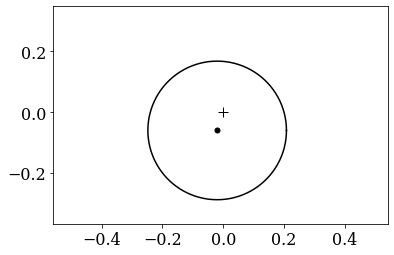

In [28]:
import numpy as np
from math import pi
from matplotlib import pyplot, mlab
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

def circulo(centro, R, N):
    alpha = np.linspace(0,2*pi,N)

    x_prime = R*np.cos(alpha)
    y_prime = R*np.sin(alpha)
    zeta = np.array(x_prime+1j*y_prime)
    zeta += centro
    
    return zeta
    

N = 101

c = 0.8
k = c/4# Tamaño del perfil

centro_x = -k/10
centro_y = -3*k/10

centro = centro_x+centro_y*1j

R = np.sqrt((k-centro_x)**2+centro_y**2)

# Generar cilindro
zeta = circulo(centro, R, N)

x_cil = np.real(zeta)
y_cil = np.imag(zeta)

pyplot.figure()

fig=pyplot.plot(x_cil,y_cil,c='k')
fig2=pyplot.plot(0, 0, marker='+', markersize=10, c='k')
fig3=pyplot.plot(centro_x,centro_y,marker='o', markersize=5, c='k')
pyplot.axis('equal')
pyplot.xlim([-(R+np.abs(centro))-R/3,(R+np.abs(centro))+R/4])
pyplot.ylim([-(R+np.abs(centro))-R/3,(R+np.abs(centro))+R/4])

(-0.5, 0.5)

<Figure size 432x288 with 0 Axes>

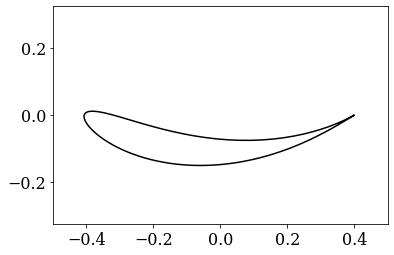

In [29]:
# Generar perfil de Joukouski
def Joukowsky(zeta, k):
    z = zeta + k*k/zeta

    return z

z = Joukowsky(zeta, k)

x = np.real(z)
y = np.imag(z)

pyplot.clf()
pyplot.figure()
fig=pyplot.plot(x,y,c='k')
pyplot.axis('equal')
pyplot.xlim([-2*k-0.1,2*k+0.1])
pyplot.ylim([-2*k-0.1,2*k+0.1])



Se ingresan las variables del sistema (ya calculados)

In [30]:
alpha_at = -15*pi/180.
U_inf = 34
rho = 1

# Flujo Alrededor del Alerón

(-0.5, 0.5)

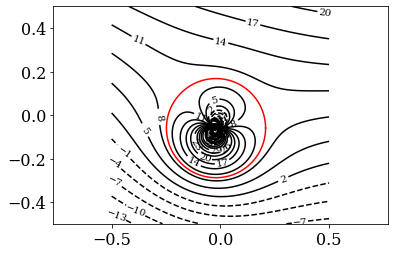

In [31]:
nx = 300
L = 1
xp = np.linspace(-L/2,L/2,nx)
Xp,Yp = np.meshgrid(xp,xp)

Zp = Xp + Yp*1j

# Flujo uniforme


PHI_U = U_inf*Zp*np.exp(-1j*alpha_at)

# Doblete (corrido a 'centro')
K= R**2*U_inf
PHI_d = K/(Zp-centro)*np.exp(1j*alpha_at)

# Vortice (corrido a 'centro')

p_sing = k+0*1j # punto singular
Gamma_k = -2*pi*1j*(U_inf*np.exp(-1j*alpha_at)*(p_sing-centro) - R**2*U_inf*np.exp(1j*alpha_at)/(p_sing-centro))
Gamma = Gamma_k

PHI_v = -1j*Gamma/(2*pi)*np.log(Zp-centro)

PHI_c = PHI_U + PHI_d + PHI_v 

psi_c = np.imag(PHI_c)
phi_c = np.real(PHI_c)

V = U_inf*np.exp(-1j*alpha_at)-R**2*U_inf*np.exp(1j*alpha_at)/((Zp-centro)**2)-1j*Gamma/(2*pi)/(Zp-centro)

contours = np.arange(-100,100,3)

pyplot.figure()
C = pyplot.contour(Xp, Yp, psi_c, contours, colors='k')
C2 = pyplot.plot(x_cil,y_cil,c='r')
pyplot.clabel(C, inline=1, fontsize=10)

pyplot.axis('equal')
pyplot.xlim([-L/2,L/2])
pyplot.ylim([-L/2,L/2])

C:\Users\achom\AppData\Local\Temp\ipykernel_10416\633160300.py:8: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = pyplot.colorbar(C3)


(-0.75, 0.75)

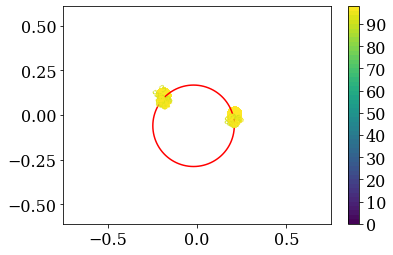

In [40]:
v = np.sqrt(np.real(V)**2 + np.imag(V)**2)

contours = np.arange(-10,10,0.1)

pyplot.figure()
C = pyplot.contourf(Xp, Yp, v, contours)
C2 = pyplot.plot(x_cil,y_cil,c='r')
#cbar = pyplot.colorbar(C3)
pyplot.clabel(C, inline=1, fontsize=10)

pyplot.axis('equal')
pyplot.xlim([-L/2,L/2])
pyplot.ylim([-L/2,L/2])

Apliquemos la tranformación de Joukowsky sobre este caso. Vamos a tener que redistribuir la data 'transformada' en un arreglo unidimensional, pues `Python` solamente acepta graficar curvas de nivel de mallas regulares (cartesianos) y la malla transfomada no lo es. Además, el flujo dentro del cilindro no tiene significado físico, por lo que sacamos esos puntos para que no nos arruine la interpolación.

(-0.5, 0.5)

<Figure size 432x288 with 0 Axes>

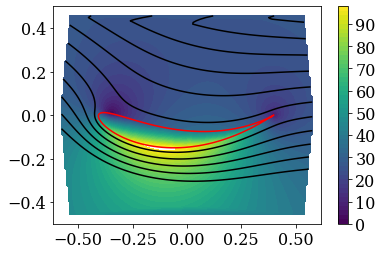

In [41]:
from scipy import interpolate

L = 1.5

Zp_1D = np.ravel(Zp)
psi_c_1D = np.ravel(psi_c)

# Los puntos dentro del cilindro no tienen significado fisico y los sacamos
fuera_cil = np.where(np.abs(Zp_1D-centro)>R)[0]

psi_perfil = psi_c_1D[fuera_cil]

Z = Joukowsky(Zp_1D[fuera_cil], k)
X = np.ravel(np.real(Z))
Y = np.ravel(np.imag(Z))


# pyplot.countour funciona solamente con mallas regulares
# Interpolar X,Y a malla regular
xi= np.linspace(-L/2,L/2,200)
Xi,Yi = np.meshgrid(xi,xi)

psi_i = interpolate.griddata((X, Y), psi_perfil, (Xi, Yi), method='linear')
v_i = interpolate.griddata((X, Y), np.ravel(v)[fuera_cil], (Xi, Yi), method='linear')


pyplot.clf()
pyplot.figure()
contours = np.arange(0,100,2)

C=pyplot.contour(Xi, Yi, psi_i, contours, colors='k')
C2=pyplot.plot(x,y,c='r')
C3 = pyplot.contourf(Xi, Yi, v_i, contours)
cbar = pyplot.colorbar(C3)

pyplot.axis('equal')
pyplot.xlim([-2*k-0.1,2*k+0.1])
pyplot.ylim([-2*k-0.1,2*k+0.1])

### Se rotará la imagen (perfil y flujo) para posicionarlo como va en realidad en un auto

Con esto me refiero que el flujo entra horizontal y el perfil está rotado

(-0.5, 0.5)

<Figure size 432x288 with 0 Axes>

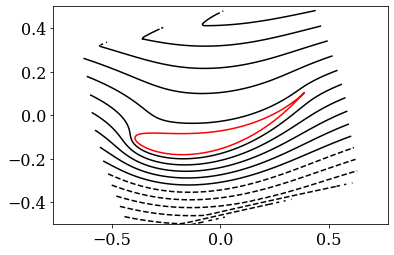

In [7]:
from scipy import interpolate

L = 1.5
# Conviene pasar Zp y psi a 1D (por np.where y mlab.griddata)
Zp_1D = np.ravel(Zp)
psi_c_1D = np.ravel(psi_c)

# Los puntos dentro del cilindro no tienen significado fisico y los sacamos
fuera_cil = np.where(np.abs(Zp_1D-centro)>R)[0]

psi_perfil = psi_c_1D[fuera_cil]

Z = Joukowsky(Zp_1D[fuera_cil], k)*np.exp(-alpha_at*1j)
X = np.ravel(np.real(Z))
Y = np.ravel(np.imag(Z))


# pyplot.countour funciona solamente con mallas regulares
# Interpolar X,Y a malla regular
xi= np.linspace(-L/2,L/2,200)
Xi,Yi = np.meshgrid(xi,xi)

psi_i = interpolate.griddata((X, Y), psi_perfil, (Xi, Yi), method='linear')

z = Joukowsky(zeta, k)*np.exp(-alpha_at*1j)

x = np.real(z)
y = np.imag(z)

pyplot.clf()
pyplot.figure()
contours = np.arange(-100,100,2)

C=pyplot.contour(Xi, Yi, psi_i, contours, colors='k')
C2=pyplot.plot(x,y,c='r')

pyplot.axis('equal')
pyplot.xlim([-2*k-0.1,2*k+0.1])
pyplot.ylim([-2*k-0.1,2*k+0.1])

### Se calcula la circulación de kutta

In [8]:

Gamma_k = -2*pi*1j*(U_inf*np.exp(-1j*alpha_at)*(p_sing-centro) - R**2*U_inf*np.exp(1j*alpha_at)/(p_sing-centro))
print (Gamma_k)

(49.08996311526416-1.1161179193627622e-14j)


In [24]:
rho = 1
Fd = np.real(-rho*Gamma_k*U_inf)
print(Fd/U_inf**2)

-2.035268538703827


In [25]:
R

0.22803508501982758

In [26]:
U_inf

64.4

In [27]:
-5*1j*5*np.pi*k*(11+3*1j)*U_inf*(np.exp(-1j*alpha_at-65*np.exp(1j*alpha_at)/(53+33*1j)))

(6997.612035346924+968.325321580821j)